# 単純ベイズ分類器で分類

法政大学　卒業生　湯浅大地

## 単純ベイズ分類器（Naive Bayes Classifier）とは

- ナイーブベイズは機械学習の手法の中でも「教師あり学習」に属する
- 他の機械学習の手法と大きく異なる点として、条件付き確率の性質でもある「ベイズの定理」を基とした手法
- ナイーブベイズは分類（Classification）のみであり回帰などに適用することはできない
- ナイーブベイズは構造が単純であるにも関わらず複雑な分類問題に対してもうまく機能する事が多々ある
- 他の機械学習手法よりも計算コストが低い

# 本発表の流れ

- 条件付き確率
- ベイズの定理
- ベイズの定理で計算してみよう
- 単純ベイズ分類器で分類してみよう

## 条件付き確率

「Bが起きたという条件でAが起きる」

$$
P(A \mid B) = \frac{P(B \cap A)}{P(B)}
$$

##  ベイズの定理

- ぱっと見どういうメリットがあるのという感じであるが

$$
P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}
$$

##  ベイズの定理のすごいとこ

- この式で重要なのは結果から原因の確率（逆確率）を求められることにある
- 結果は観測しやすいけどその原因が分からないような場合に、ベイズの定理が威力を発揮する
- 確率P(原因|結果)が確率P(結果|原因)から導かれる式になっていることを確認しましょう

$$
P(原因 \mid 結果) = \frac{P(結果 \mid 原因)P(原因)}{P(結果)}
$$

## ベイズの定理で計算してみよう

電車の遅延分数と遅刻/定時出社の人数をまとめたデータ

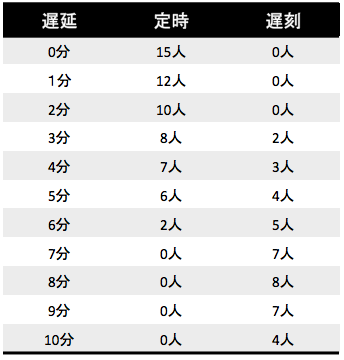

In [43]:
from IPython.display import Image
Image("./work_late_table.png")

### 電車が5分遅延した場合、遅刻する確率は?

$$
P(遅刻 \mid 5分遅延) = \frac{P(5分遅延 \mid 遅刻)P(遅刻)}{P(5分遅延)}
$$

In [44]:
# 定時と遅刻のデータを作成
in_time = [(0, 15), (1, 12), (2, 10), (3, 8),
           (4, 7), (5, 6), (6, 2), (7, 0),
           (8, 0), (9, 0), (10, 0)]
too_late = [(0,0),(1, 0), (2, 0), (3, 2), (4, 3), 
            (5, 4), (6, 5), (7,7), (8, 8),
            (9, 7), (10, 4)]

### 𝑃(5分遅延∣遅刻)を算出

In [45]:
# 遅刻した人数を算出
chikoku = 0
for i in range(0,11):
    chikoku += too_late[i][1]
chikoku

40

In [46]:
# 5分遅延かつ遅刻の人数を算出
min5 = too_late[5][1]
min5

4

In [47]:
# P(5分遅延 | 遅刻)を算出
likelihood = min5 / chikoku
print(likelihood)

0.1


### 𝑃(遅刻)を算出

In [48]:
# 全人数を算出（100名）
total = 0
for i in range(0, 11):
    total += in_time[i][1]
    total += too_late[i][1]
total

100

In [49]:
# P(遅刻) = 遅刻した人数 ÷ 全人数
prior = chikoku / total
print(prior)

0.4


### 𝑃(5分遅延)を算出

In [50]:
# 5分遅延の人数合計
min5_total = in_time[5][1] + too_late[5][1]
min5_total

10

In [51]:
# P(5分遅延) = 5分遅延した人数 ÷ 全人数
marginal = min5_total / total
print(marginal)

0.1


In [52]:
# P(遅刻∣5分遅延)
(likelihood * prior) / marginal

0.4000000000000001

## 単純ベイズ分類器で分類してみよう

### 社員一人ひとりを各行に、列には遅刻したら「1」、定時の場合は（0）、さらにそれぞれの電車遅延分数を値として作成します。

In [53]:
# クラス（定時＝0、遅刻＝1）
LateTarget = [0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,
1,1,1,1,1,1,1,1,1,1,
1,1,1,1,1,1,1,1,1,1,
1,1,1,1,1,1,1,1,1,1,
1,1,1,1,1,1,1,1,1,1]

In [54]:
# 特徴量（電車遅延分数）
MinutesLate = [0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,1,1,1,1,1,
1,1,1,1,1,1,1,2,2,2,
2,2,2,2,2,2,2,3,3,3,
3,3,3,3,3,4,4,4,4,4,
4,4,5,5,5,5,5,5,6,6,
3,3,4,4,4,5,5,5,5,6,
6,6,6,6,7,7,7,7,7,7,
7,8,8,8,8,8,8,8,8,9,
9,9,9,9,9,9,10,10,10,10]

In [55]:
import pandas as pd
# データフレームの作成
ML = pd.DataFrame({'MinutesLate':MinutesLate,'LateTarget': LateTarget})
ML[58: 63]

,MinutesLate,LateTarget
58,6,0
59,6,0
60,3,1
61,3,1
62,4,1


In [56]:
# データフレームのサイズ確認
ML.shape

(100, 2)

###  Scikit-learnのsklearn.naive_bayesのモジュール

- Scikit-learnのsklearn.naive_bayesのモジュールを利用する事で、ナイーブベイズのアルゴリズムを利用する事が可能
- sklearn.naive_bayesには訓練データの特性に応じて3種類のナイーブベイズのアルゴリズムが実装されている
    - GaussianNB（ガウシアン・ナイーブベイズ）
    - MultinomialNB（多項分布・ナイーブベイズ）
    - BernoulliNB（ベルヌーイ・ナイーブベイズ）
- 今回はGaussianNB()を利用する

In [57]:
# Scikit-learnのナイーブベイズのモジュールをインポート
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [58]:
# 特徴量（電車遅延分数）とターゲット（定時/遅刻）を訓練
clf = clf.fit(ML['MinutesLate'].values.reshape(-1,1),ML['LateTarget'])

In [59]:
# 特徴量毎の確率を算出
ypredprob = clf.predict_proba(ML['MinutesLate'].values.reshape(-1,1))

# データフレームに格納
ML['prob'] = ypredprob[:,1]

In [60]:
# データフレームを確認
ML[58: 63]

,MinutesLate,LateTarget,prob
58,6,0,0.847262
59,6,0,0.847262
60,3,1,0.070537
61,3,1,0.070537
62,4,1,0.232496


### 特徴量毎の確率の算出結果

- ↓上から電車遅延分数0,1,2…10分
- 電車遅延数が増えていくほど、遅刻する確率が増えることを確認できる

In [61]:
# 特徴量ごとの確率を確認
list(ML['prob'].unique())

[0.0015736833310562891,
 0.005444352749944612,
 0.01952603620790533,
 0.07053685129948228,
 0.2324959743345932,
 0.5588055497774197,
 0.8472622824652528,
 0.9621902793943331,
 0.9918889954984073,
 0.9983780754022074,
 0.9996919786114439]

In [62]:
# 特徴量からターゲットを予測
ypred = clf.predict(ML['MinutesLate'].values.reshape(-1,1))
ML['prediction'] = ypred
ML[58: 63]

,MinutesLate,LateTarget,prob,prediction
58,6,0,0.847262,1
59,6,0,0.847262,1
60,3,1,0.070537,0
61,3,1,0.070537,0
62,4,1,0.232496,0


# おわりに

- 単純ベイズ分類器は分類問題に使える
- ネガポジを分類しているデータさえ用意すれば、トーン分析に応用できる